# Monitor the training process -- Weather Prediction

## 0. Import packages and modules

In [1]:
import os
# Limit log messages from Tensorflow
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn
import tensorflow
import keras

print(sklearn.__version__)
print(tensorflow.__version__)
print(keras.__version__)

1.6.1
2.14.0.600
2.14.0


In [3]:
# print GPU info

import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


/usr/share/libdrm/amdgpu.ids: No such file or directory


## 1. Formulate / Outline the problem: weather prediction

In [4]:
data = pd.read_csv("https://zenodo.org/record/5071376/files/weather_prediction_dataset_light.csv?download=1")
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


## 2. Identify inputs and outputs

In [5]:
data

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-15.1,-16.2,-14.0,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-10.9,-14.4,-7.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-6.6,-7.6,-5.6,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-7.2,-8.9,-5.4,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


In [6]:
data.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'DE_BILT_cloud_cover', 'DE_BILT_humidity', 'DE_BILT_pressure',
       'DE_BILT_global_radiation', 'DE_BILT_precipitation', 'DE_BILT_sunshine',
       'DE_BILT_temp_mean', 'DE_BILT_temp_min', 'DE_BILT_temp_max',
       'DRESDEN_cloud_cover', 'DRESDEN_humidity', 'DRESDEN_global_radiation',
       'DRESDEN_precipitation', 'DRESDEN_sunshine', 'DRESDEN_temp_mean',
       'DRESDEN_temp_min', 'DRESDEN_temp_max', 'DUSSELDORF_cloud_cover',
       'DUSSELDORF_humidity', 'DUSSELDORF_pressure',
       'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation',
       'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min',
       'DUSSELDORF_temp_max', 'HEATHROW_cloud_cover', 'HEATHROW_humidity',
       'HEATHROW_pressure', 'HEATHROW_global_radiation',
       'HEATH

In [7]:
data.shape

(3654, 91)

## 3. Prepare data

In [8]:
nr_rows = 365*3 # 3 years

# data
X_data = data.loc[:nr_rows] # Select first 3 years
X_data = X_data.drop(columns=['DATE', 'MONTH']) # Drop date and month column

# labels (sunshine hours the next day)
y_data = data.loc[1:(nr_rows + 1)]["BASEL_sunshine"]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(X_data, y_data, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=0)

## 4. Building architecture from scratch

In [10]:
def create_nn(input_shape):
    # Input layer
    inputs = keras.Input(shape=input_shape, name='input')

    # Dense layers
    layers_dense = keras.layers.Dense(100, 'relu')(inputs)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)

    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)

    return keras.Model(inputs=inputs, outputs=outputs, name="weather_prediction_model")

model = create_nn(input_shape=(X_data.shape[1],))

In [11]:
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 89)]              0         
                                                                 
 dense (Dense)               (None, 100)               9000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14101 (55.08 KB)
Trainable params: 14101 (55.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 5. Choose a loss function and optimizer

In [12]:
# loss function

model.compile(loss='mse')

In [13]:
# optimizer

model.compile(optimizer='adam', loss='mse')

In [14]:
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

In [15]:
def compile_model(model):
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=[keras.metrics.RootMeanSquaredError()]
    )

compile_model(model)

## 6. Train the model

In [16]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    verbose=2)

Epoch 1/200
24/24 - 12s - loss: 20.6698 - root_mean_squared_error: 4.5464 - 12s/epoch - 501ms/step
Epoch 2/200
24/24 - 0s - loss: 12.9513 - root_mean_squared_error: 3.5988 - 40ms/epoch - 2ms/step
Epoch 3/200
24/24 - 0s - loss: 12.2302 - root_mean_squared_error: 3.4972 - 38ms/epoch - 2ms/step
Epoch 4/200
24/24 - 0s - loss: 11.8147 - root_mean_squared_error: 3.4373 - 38ms/epoch - 2ms/step
Epoch 5/200
24/24 - 0s - loss: 11.4126 - root_mean_squared_error: 3.3782 - 38ms/epoch - 2ms/step
Epoch 6/200
24/24 - 0s - loss: 11.1954 - root_mean_squared_error: 3.3460 - 37ms/epoch - 2ms/step
Epoch 7/200
24/24 - 0s - loss: 10.6589 - root_mean_squared_error: 3.2648 - 37ms/epoch - 2ms/step
Epoch 8/200
24/24 - 0s - loss: 10.4097 - root_mean_squared_error: 3.2264 - 37ms/epoch - 2ms/step
Epoch 9/200
24/24 - 0s - loss: 10.4527 - root_mean_squared_error: 3.2331 - 36ms/epoch - 2ms/step
Epoch 10/200
24/24 - 0s - loss: 10.3438 - root_mean_squared_error: 3.2162 - 37ms/epoch - 2ms/step
Epoch 11/200
24/24 - 0s - l

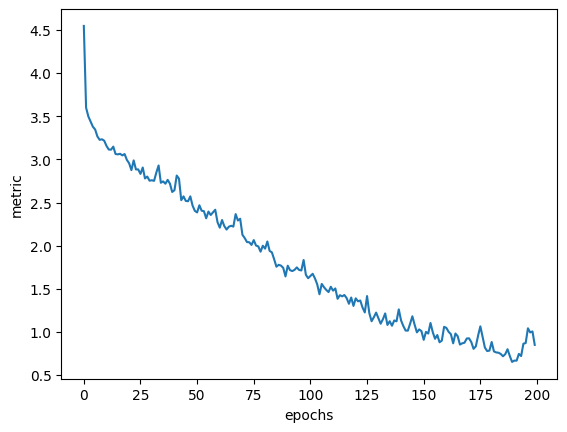

In [17]:
def plot_history(history, metrics):
    """
    Plot the training history

    Args:
        history (keras History object that is returned by model.fit())
        metrics (str, list): Metric or a list of metrics to plot
    """
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("metric")

plot_history(history, 'root_mean_squared_error')

## 7. Perform a Prediction/Classification

In [18]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


## 8. Measure performance

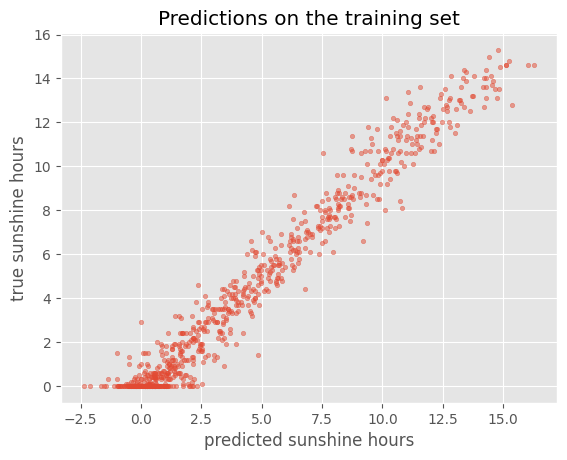

In [19]:
def plot_predictions(y_pred, y_true, title):
    plt.style.use('ggplot')  # optional, that's only to define a visual style
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel("predicted sunshine hours")
    plt.ylabel("true sunshine hours")
    plt.title(title)

plot_predictions(y_train_predicted, y_train, title='Predictions on the training set')

In [20]:
train_metrics = model.evaluate(X_train, y_train, return_dict=True)
test_metrics = model.evaluate(X_test, y_test, return_dict=True)

print('Train RMSE: {:.2f}, Test RMSE: {:.2f}'.format(train_metrics['root_mean_squared_error'], test_metrics['root_mean_squared_error']))

6/6 [==============================] - 0s 2ms/step - loss: 14.5545 - root_mean_squared_error: 3.8150
Train RMSE: 0.86, Test RMSE: 3.82


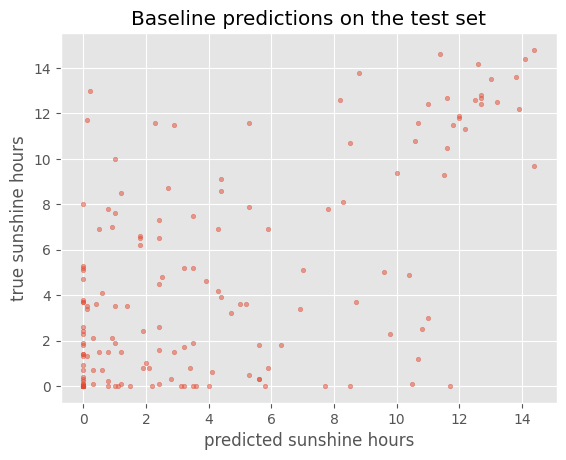

In [21]:
y_baseline_prediction = X_test['BASEL_sunshine']
plot_predictions(y_baseline_prediction, y_test, title='Baseline predictions on the test set')

In [22]:
from sklearn.metrics import root_mean_squared_error

rmse_baseline = root_mean_squared_error(y_test, y_baseline_prediction)
print('Baseline:', rmse_baseline)
print('Neural network: ', test_metrics['root_mean_squared_error'])

Baseline: 3.877323350410224
Neural network:  3.815034866333008


## 9. Refine the model

In [23]:
model = create_nn(input_shape=(X_data.shape[1],))
compile_model(model)

In [24]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    validation_data=(X_val, y_val))

Epoch 1/200
24/24 [==============================] - 1s 6ms/step - loss: 22.7466 - root_mean_squared_error: 4.7693 - val_loss: 14.6777 - val_root_mean_squared_error: 3.8311
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 13.1020 - root_mean_squared_error: 3.6197 - val_loss: 12.0259 - val_root_mean_squared_error: 3.4678
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 12.3490 - root_mean_squared_error: 3.5141 - val_loss: 12.6478 - val_root_mean_squared_error: 3.5564
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 11.8998 - root_mean_squared_error: 3.4496 - val_loss: 12.4469 - val_root_mean_squared_error: 3.5280
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 11.5685 - root_mean_squared_error: 3.4013 - val_loss: 12.1431 - val_root_mean_squared_error: 3.4847
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 11.4685 - root_mean_squared_error: 3.3865 - val_loss: 11.5454 

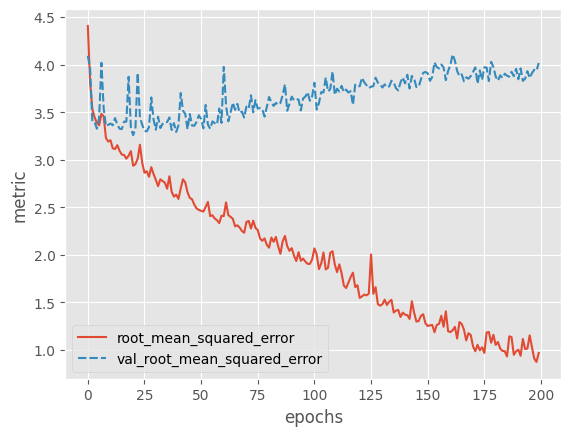

In [61]:
plot_history(history, ['root_mean_squared_error', 'val_root_mean_squared_error'])

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10
    )

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper])

Epoch 1/200
24/24 [==============================] - 0s 4ms/step - loss: 0.9393 - root_mean_squared_error: 0.9692 - val_loss: 15.6599 - val_root_mean_squared_error: 3.9573
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 0.7436 - root_mean_squared_error: 0.8623 - val_loss: 15.3508 - val_root_mean_squared_error: 3.9180
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 0.8351 - root_mean_squared_error: 0.9139 - val_loss: 14.8001 - val_root_mean_squared_error: 3.8471
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6510 - root_mean_squared_error: 0.8068 - val_loss: 15.3087 - val_root_mean_squared_error: 3.9126
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 0.9850 - root_mean_squared_error: 0.9924 - val_loss: 15.6235 - val_root_mean_squared_error: 3.9527
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 1.1558 - root_mean_squared_error: 1.0751 - val_loss: 14.7084 - val_

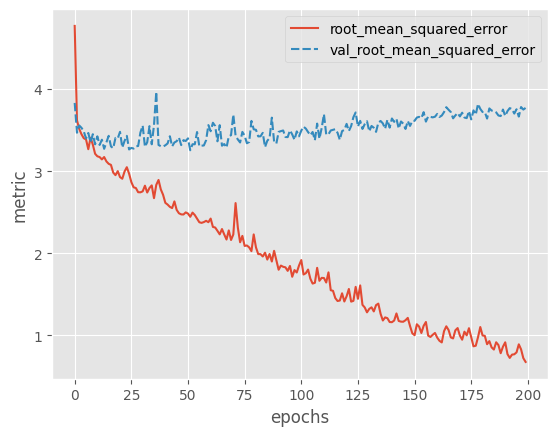

In [25]:
plot_history(history, ['root_mean_squared_error', 'val_root_mean_squared_error'])

#### Early stopping: stop when things are looking best

In [31]:
model = create_nn(input_shape=(X_data.shape[1],))
compile_model(model)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10
)

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 1000,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper])

Epoch 1/1000
24/24 [==============================] - 1s 7ms/step - loss: 21.3505 - root_mean_squared_error: 4.6207 - val_loss: 218.0719 - val_root_mean_squared_error: 14.7673
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 13.2778 - root_mean_squared_error: 3.6439 - val_loss: 46.8171 - val_root_mean_squared_error: 6.8423
Epoch 3/1000
24/24 [==============================] - 0s 3ms/step - loss: 11.4119 - root_mean_squared_error: 3.3782 - val_loss: 28.7627 - val_root_mean_squared_error: 5.3631
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 11.0108 - root_mean_squared_error: 3.3182 - val_loss: 20.6595 - val_root_mean_squared_error: 4.5453
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 10.6488 - root_mean_squared_error: 3.2633 - val_loss: 14.4739 - val_root_mean_squared_error: 3.8045
Epoch 6/1000
24/24 [==============================] - 0s 3ms/step - loss: 10.0907 - root_mean_squared_error: 3.1766 - val_loss: 

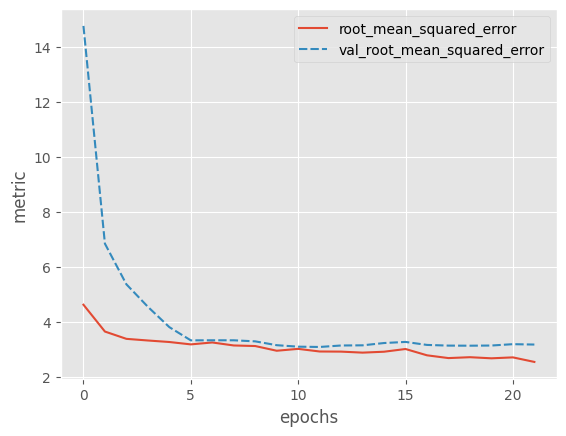

In [33]:
plot_history(history, ['root_mean_squared_error', 'val_root_mean_squared_error'])

#### BatchNorm: the “standard scaler” for deep learning

In [34]:
def create_nn(input_shape):
    # Input layer
    inputs = keras.layers.Input(shape=input_shape, name='input')

    # Dense layers
    layers_dense = keras.layers.BatchNormalization()(inputs) # This is new!
    layers_dense = keras.layers.Dense(100, 'relu')(layers_dense)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)

    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)

    # Defining the model and compiling it
    return keras.Model(inputs=inputs, outputs=outputs, name="model_batchnorm")


model = create_nn(input_shape=(X_data.shape[1],))
compile_model(model)
model.summary()

Model: "model_batchnorm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 89)]              0         
                                                                 
 batch_normalization_3 (Bat  (None, 89)                356       
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 100)               9000      
                                                                 
 dense_16 (Dense)            (None, 50)                5050      
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 14457 (56.47 KB)
Trainable params: 14279 (55.78 KB)
Non-trainable params: 178 (712.00 Byte)
___________

In [35]:
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 1000,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper])

Epoch 1/1000
24/24 [==============================] - 1s 7ms/step - loss: 24.4979 - root_mean_squared_error: 4.9495 - val_loss: 161.1735 - val_root_mean_squared_error: 12.6954
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 14.7156 - root_mean_squared_error: 3.8361 - val_loss: 49.7312 - val_root_mean_squared_error: 7.0520
Epoch 3/1000
24/24 [==============================] - 0s 3ms/step - loss: 11.9987 - root_mean_squared_error: 3.4639 - val_loss: 37.6064 - val_root_mean_squared_error: 6.1324
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 11.2676 - root_mean_squared_error: 3.3567 - val_loss: 24.8776 - val_root_mean_squared_error: 4.9877
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 11.1133 - root_mean_squared_error: 3.3337 - val_loss: 17.5889 - val_root_mean_squared_error: 4.1939
Epoch 6/1000
24/24 [==============================] - 0s 3ms/step - loss: 10.2746 - root_mean_squared_error: 3.2054 - val_loss: 

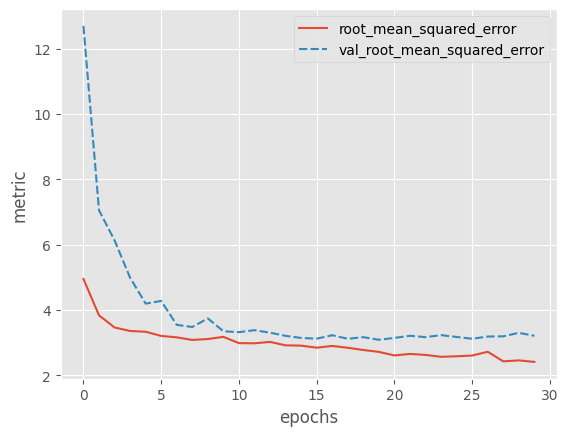

In [36]:
plot_history(history, ['root_mean_squared_error', 'val_root_mean_squared_error'])

6/6 [==============================] - 0s 1ms/step


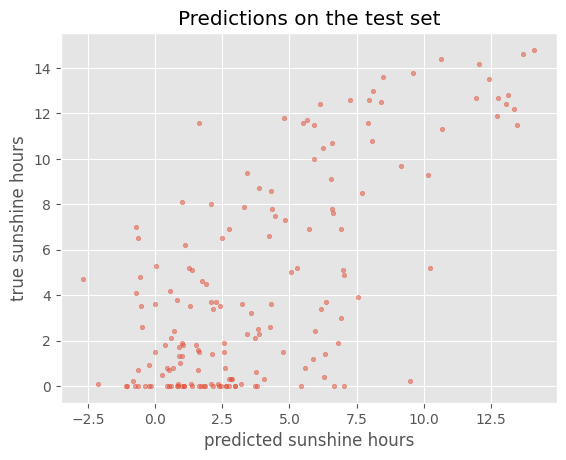

In [37]:
y_test_predicted = model.predict(X_test)
plot_predictions(y_test_predicted, y_test, title='Predictions on the test set')

## 10. Save model

In [38]:
model.save('weather_prediction.keras')